Saving Crop_recommendation.csv to Crop_recommendation (2).csv
✅ Dataset Preview:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

🎯 Accuracy: 0.99

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00   

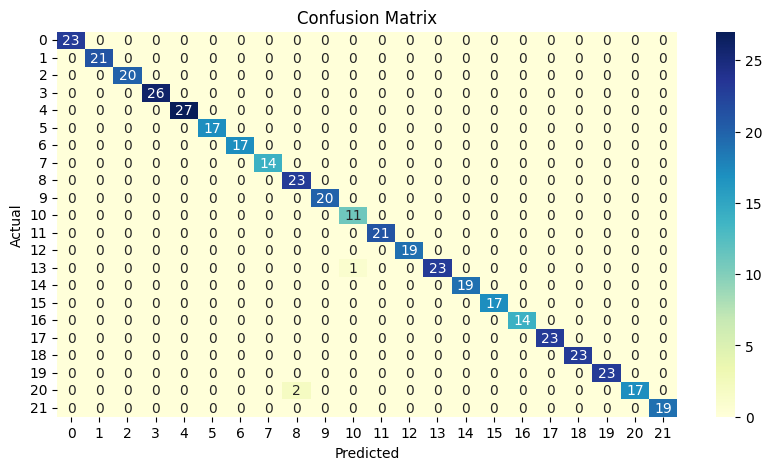


🌿 Enter values to get crop recommendation:
Nitrogen (N): 27
Phosphorous (P): 21
Potassium (K): 15
Temperature (°C): 34
Humidity (%): 54
pH value: 8
Rainfall (mm): 90

✅ Recommended Crop: mango


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
# ✅ STEP 1: Install required libraries (only if missing in Colab)
!pip install -q scikit-learn

# ✅ STEP 2: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ STEP 3: Upload CSV File
from google.colab import files
uploaded = files.upload()  # Select "Crop_recommendation.csv" here

# ✅ STEP 4: Load dataset
filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("✅ Dataset Preview:")
print(df.head())

# ✅ STEP 5: Encode the target labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# ✅ STEP 6: Prepare features and target
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# ✅ STEP 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 8: Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ✅ STEP 9: Model Evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ STEP 10: Crop Recommendation Function
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = clf.predict(input_data)
    crop = le.inverse_transform(prediction)
    return crop[0]

# ✅ STEP 11: Take user input for prediction
print("\n🌿 Enter values to get crop recommendation:")
N = int(input("Nitrogen (N): "))
P = int(input("Phosphorous (P): "))
K = int(input("Potassium (K): "))
temperature = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
ph = float(input("pH value: "))
rainfall = float(input("Rainfall (mm): "))

# ✅ STEP 12: Get prediction
recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"\n✅ Recommended Crop: {recommended_crop}")